This notebook is a basic example of the `twinlab` library.

First we import the required libraries. `os` allows us to interact with the operating system, used here to create file paths. `numpy` is used to allow us to manipulate arrays with efficiency. `pandas` gives us access to Pandas Dataframes which are a much better way of storing our data. `matplotlib.pyplot` lets us plot graphs with our data. `twinlab` is the main library we are using. Some of the libraries are renamed using `as` for convenience. 

In [1]:
# Standard imports
# 'os' allows us to use paths
import os

# Third-party imports
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

# Project imports
import twinlab as tl


         === TwinLab Client Initialisation ===
         Training : https://pdersvjxmgrkqojwyeyocqm7le0iwtkx.lambda-url.eu-west-2.on.aws/
         Server   : https://mt9w8ln59j.execute-api.eu-west-2.amazonaws.com/dev
         Group    : digilab
         User     : tim



Here we create file paths using `os`, which we will use later to locate where our training and input data is stored.

In [2]:
# File paths
campaign_dir = os.path.join("..", "campaigns", "basic")
datasets_dir = os.path.join("..", "datasets")
dataset_id = "basic.csv"
file_train = os.path.join(datasets_dir, "basic.csv")
file_eval = os.path.join(campaign_dir, "eval.csv")
file_params = os.path.join(campaign_dir, "params.json")

# Campaign id
campaign_id = "basic"

In this cell we use the `twinLab` library to give the data located at the address stored in the `filetrain` variable to the machine learning model on the web. The `verbose` argument lets the user see information about the upload, which is what creates the grey text below when the program runs.

In [3]:
# Upload dataset to the cloud
tl.upload_dataset(file_train, dataset_name=dataset_id, verbose=True)

Response: Presigned URL generated successfully

File ..\datasets\basic.csv uploaded successfully.

Uploading basic.csv
Response: Dataset basic.csv processed successfully



This lists all of the datasets that the model has been given, including the one we gave it in the previous cell.

In [4]:
# List datasets
_ = tl.list_datasets(verbose=True)

Response: Found 4 datasets

Datasets:
['adaas', 'basic', 'basic.csv', 'test.csv']


This trains the model using the data it has been given. The first argument is a variable containing the path/address to the `params.json` file, which tells the model which file the training data is in, which numbers are the inputs in that file, and which are the corresponding outputs for it to learn from. 

In [5]:
# Start a new campaign and train an emulator
tl.train_campaign(file_params, campaign_id, verbose=True)

Response: Training basic complete



`list_campaigns` lists all of the different models that we could use. We are using the one named 'basic' which we defined earlier in a variable called `campaign_id`.

In [6]:
# List campaigns
_ = tl.list_campaigns(verbose=True)

Response: Found 2 campaigns

Campaigns:
['test', 'basic']


`query_campaign` displays statistics about the model we are using.

In [7]:
# Look at the status of a campaign
_ = tl.query_campaign(campaign_id, verbose=True)

Response: Query of basic campaign complete

Metadata:
{'inputs': ['x'],
 'outputs': ['y'],
 'diagnostics': {'transformer_diagnostics': [],
                 'estimator_diagnostics': {'likelihood.noise_covar.raw_noise': [0.031576525703138],
                                           'likelihood.noise_covar.noise_prior.concentration': 1.100000023841858,
                                           'likelihood.noise_covar.noise_prior.rate': 0.05000000074505806,
                                           'likelihood.noise_covar.raw_noise_constraint.lower_bound': 9.999999747378752e-05,
                                           'likelihood.noise_covar.raw_noise_constraint.upper_bound': inf,
                                           'mean_module.raw_constant': 0.21052500685319275,
                                           'covar_module.raw_outputscale': 1.5142710611310786,
                                           'covar_module.base_kernel.raw_lengthscale': [[-0.6408405631160676]],
         

This step takes in the input numbers found in the `eval.csv` file, and using the pattern it has learned from the training data, it generates corresponding outputs. These are the model 'predicting' what it thinks the outputs will be, so we call it `predict_campaign`. The predicted output values are assigned to `df_mean`. `df_std` stores how uncertain the model was over each value, saying that the true value could be anywhere in the range of the `df_mean` value plus or minus the `df_std` value. 

In [8]:
# Predict using the trained emulator
df_mean, df_std = tl.predict_campaign(file_eval, campaign_id, verbose=True)

Response: Prediction from basic campaign complete

Mean: 
             y
0    0.617689
1    0.629105
2    0.640630
3    0.652252
4    0.663957
..        ...
123 -0.207700
124 -0.185577
125 -0.164109
126 -0.143321
127 -0.123230

[128 rows x 1 columns] 

Std: 
             y
0    0.642656
1    0.626627
2    0.610103
3    0.593090
4    0.575600
..        ...
123  0.131604
124  0.129953
125  0.132195
126  0.138525
127  0.148704

[128 rows x 1 columns] 



We now load the data from the `basic.csv` file, which contains training data. The address for this file is stored in the `file_train` variable. We also load the input and output data from the prediction we did in the previous step.  

In [9]:
# Load training and evaluation data (for plotting)
df_train = pd.read_csv(file_train)
df_eval = pd.read_csv(file_eval)

Now we plot a graph using the data we loaded in the previous step. The ten training $X$ and $y$ values we gave it in the `basic.csv` file are displayed as black dots on the graph. The blue sections show the range of $y$ values a given $X$ value could take, with the inner, darker blue sections being where the model is more certain the value lies. 

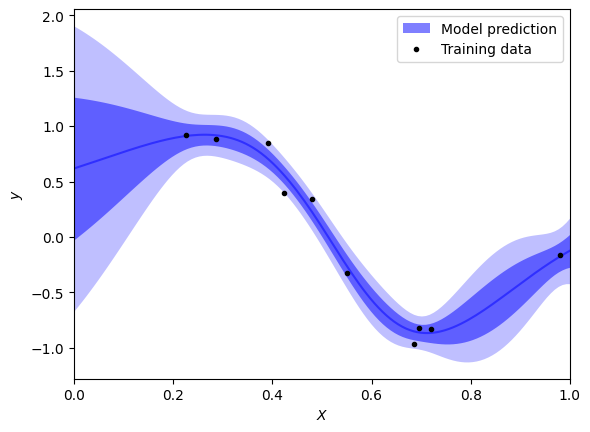

In [10]:
# Plot parameters
nsigs = [1, 2]
# nsigs = [0.674, 1.960, 2.576]
color = "blue"
alpha = 0.5
plot_training_data = True
plot_model_mean = True
plot_model_bands = True

# Plot results
grid = df_eval["x"]
mean = df_mean["y"]
err = df_std["y"]
if plot_model_bands:
    label = "Model prediction"
    plt.fill_between(grid, np.nan, np.nan, lw=0, color=color, alpha=alpha, label=label)
    for isig, nsig in enumerate(nsigs):
        plt.fill_between(grid, mean-nsig*err, mean+nsig*err, lw=0, color=color, alpha=alpha/(isig+1))
if plot_model_mean:
    label = "Model prediction" if not plot_model_bands else None
    plt.plot(grid, mean, color=color, alpha=alpha, label=label)
if plot_training_data:
    plt.plot(df_train["x"], df_train["y"], ".", color="black", label="Training data")
plt.xlim((0.0, 1))
plt.xlabel("$X$")
plt.ylabel("$y$")
plt.legend()
plt.show()

We finally delete the model and dataset off the web server.

In [11]:
# Delete campaign and dataset (if desired)
tl.delete_campaign(campaign_id, verbose=True)
tl.delete_dataset(dataset_id, verbose=True)

Response: basic campaign deleted successfully

Response: basic.csv dataset and summary deleted successfully

